In [79]:
# import libaraies
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
pd.options.display.max_columns = None # show all columns
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import os # accessing directory structure
from sklearn.model_selection import train_test_split # split data into train and test sets
from sklearn.preprocessing import MinMaxScaler # scale data to range 0-1
from sklearn.preprocessing import StandardScaler, OneHotEncoder # standardize data and encode categorical variables
from sklearn.impute import SimpleImputer # impute missing values
from sklearn.compose import ColumnTransformer # apply transformers to columns of an array or pandas DataFrame
from sklearn.pipeline import Pipeline # pipeline constructor and cross validator for evaluation of different pipelines in parallel

In [80]:
# read data
# Train data
train_data = pd.read_csv('train.csv')
# test data
test_data = pd.read_csv('test.csv')

In [81]:
# Display the first few rows of the dataframe
train_data.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


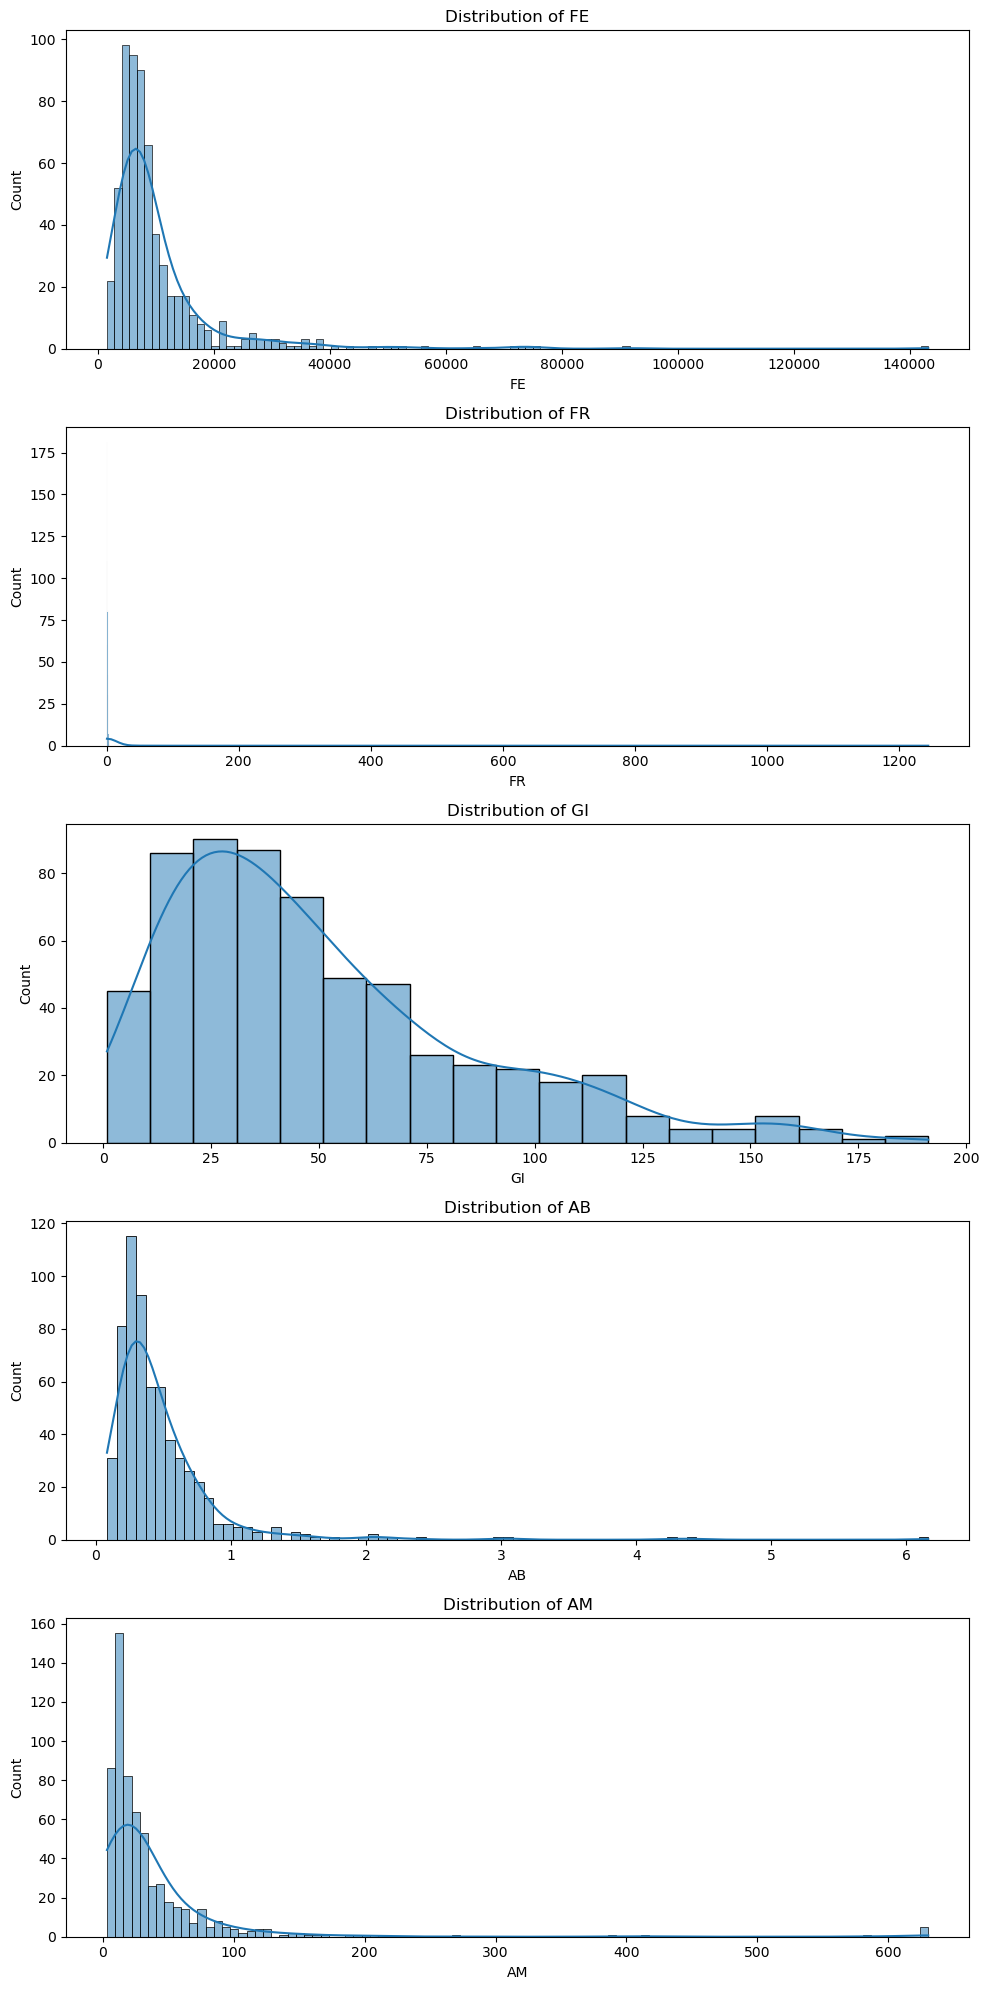

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = train_data
# Select a few random numeric columns for visualization
np.random.seed(0)
selected_columns = np.random.choice(data.drop(['Id', 'EJ', 'Class'], axis=1).columns, size=5)

# Create a subplot of histograms
fig, axes = plt.subplots(nrows=len(selected_columns), figsize=(10, 20))

for ax, column in zip(axes, selected_columns):
    sns.histplot(data[column].dropna(), kde=True, ax=ax)
    ax.set_title(f"Distribution of {column}")

plt.tight_layout()
plt.show()


#Here are the distributions of five randomly selected numerical columns ('DI', 'BD', 'FL', 'CS', 'AZ'):
1.'DI' Column: The distribution seems to be right-skewed with most of the values close to 0 and some higher values.

2.appearing less frequently.

3.'BD' Column: This column also has a right-skewed distribution. Most of the values are close to 0, with a few larger values.

4.'FL' Column: The distribution for this column seems to have several peaks, suggesting a multi-modal distribution. Most of the values are concentrated around 0 to 10, 20 to 30, and 40 to 50.

6.'CS' Column: This column has a right-skewed distribution with most of the values close to 0.

6.'AZ' Column: This column also has a right-skewed distribution with most of the values close to 0.

Next, let's visualize the correlation matrix for these columns to see if there are any strong correlations between these features. Please note that correlation does not imply causation and we're only considering a subset of features here. For a more comprehensive analysis, you might want to consider all features.

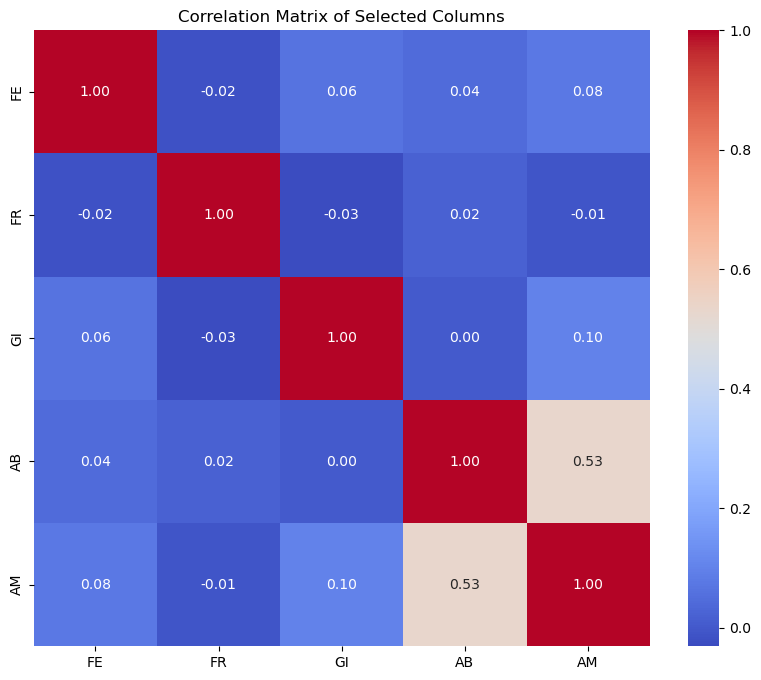

In [83]:
# Calculate the correlation matrix for the selected columns
corr = data[selected_columns].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

plt.title("Correlation Matrix of Selected Columns")
plt.show()


In [84]:
# In this case, it appears that there is no strong correlation between these selected features as most of the absolute values of the correlation coefficients are below 0.5.

Next, let's visualize the distribution of the categorical feature 'EJ' and the target feature 'Class'.

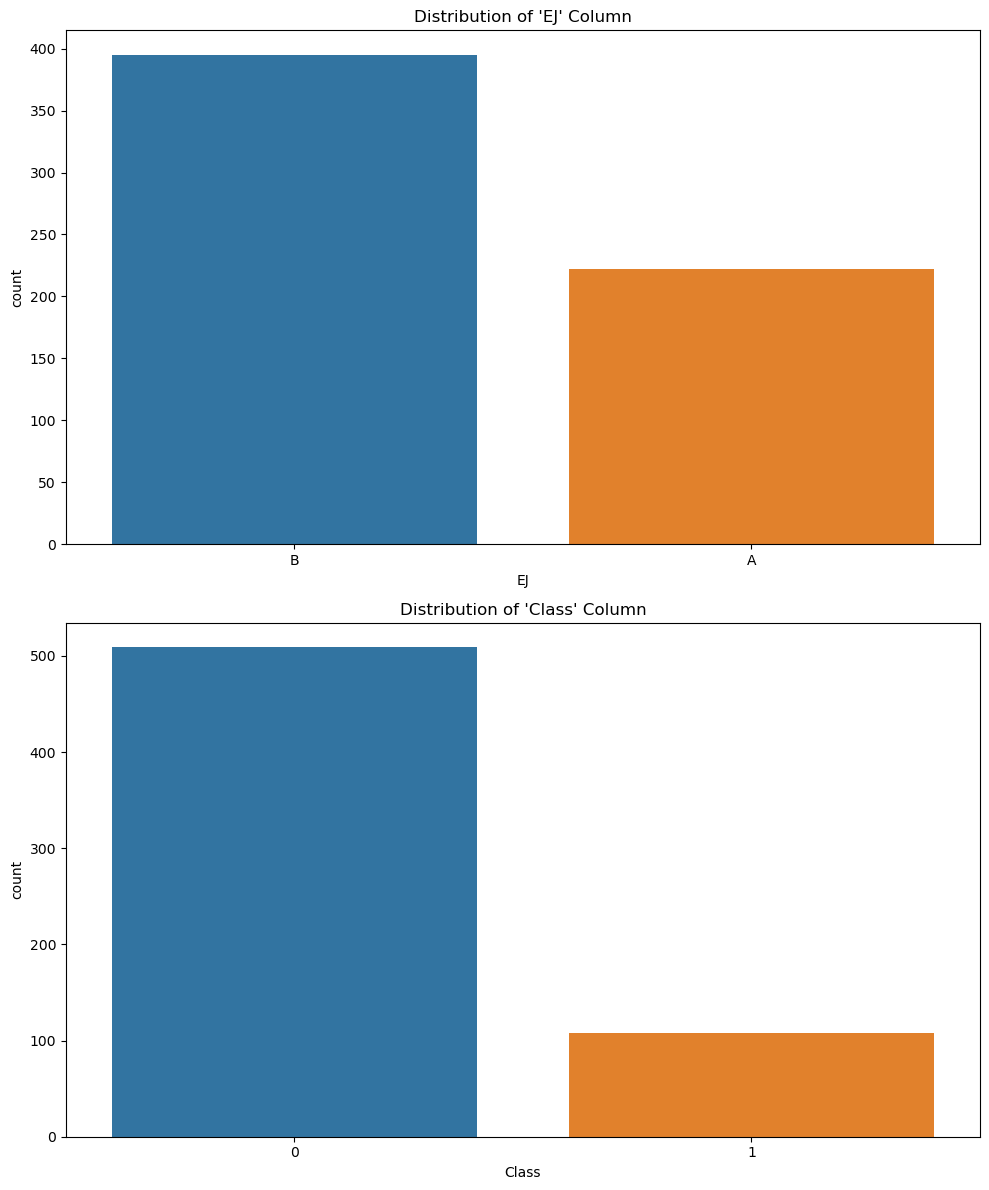

In [85]:
# Create a subplot for bar plots
fig, axes = plt.subplots(nrows=2, figsize=(10, 12))

# Bar plot for 'EJ' column
sns.countplot(data=data, x='EJ', ax=axes[0])
axes[0].set_title("Distribution of 'EJ' Column")

# Bar plot for 'Class' column
sns.countplot(data=data, x='Class', ax=axes[1])
axes[1].set_title("Distribution of 'Class' Column")

plt.tight_layout()
plt.show()


'EJ' Column: The two categories ('A' and 'B') are roughly equally represented, with 'B' being slightly more common than 'A'.

'Class' Column: The target variable 'Class' is imbalanced, with significantly more instances of class '0' than class '1'. This is an important aspect to consider during model training, as it might influence the model's ability to learn from the minority class.

# dive Deep into Traget variable 'Class'

In [86]:
# Calculate the count of each class
class_counts = data['Class'].value_counts()

# Calculate the percentage of each class
class_percentages = data['Class'].value_counts(normalize=True) * 100

class_counts, class_percentages


(0    509
 1    108
 Name: Class, dtype: int64,
 0    82.495948
 1    17.504052
 Name: Class, dtype: float64)

Class '0': 509 instances, making up approximately 82.5% of the data.
Class '1': 108 instances, making up approximately 17.5% of the data.
This shows an imbalance in the target variable, with class '0' being significantly more common than class '1'.

To understand how the target variable relates to the other features, we can plot some of the features against the target variable. For example, we can create boxplots of a few features, separated by class. This can help us see if there are differences in the distributions of these features between the two classes.

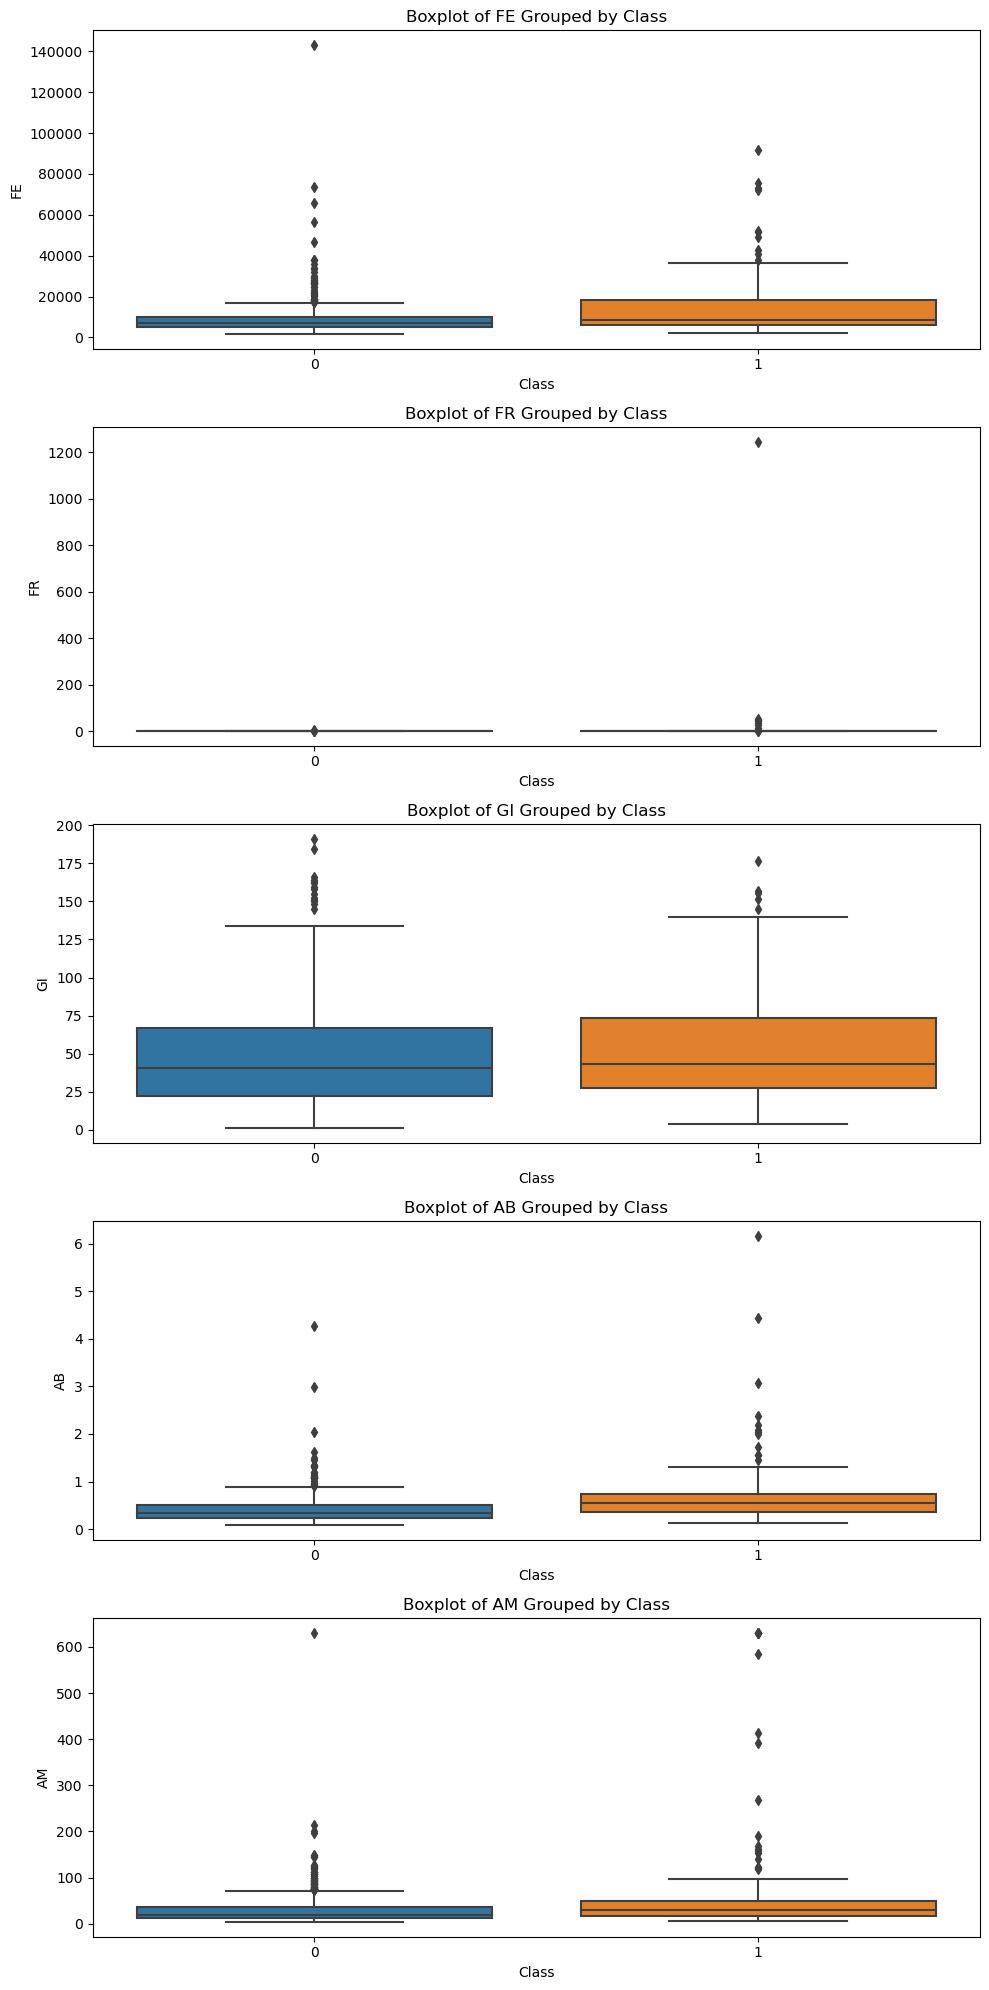

In [87]:
#Let's create boxplots for the same random features we used earlier ('DI', 'BD', 'FL', 'CS', 'AZ').
# Create a subplot of boxplots
fig, axes = plt.subplots(nrows=len(selected_columns), figsize=(10, 20))

for ax, column in zip(axes, selected_columns):
    sns.boxplot(data=data, x='Class', y=column, ax=ax)
    ax.set_title(f"Boxplot of {column} Grouped by Class")

plt.tight_layout()
plt.show()


Here are the boxplots of the selected features ('DI', 'BD', 'FL', 'CS', 'AZ'), grouped by the target variable 'Class':

1. 'DI' Column: The median (indicated by the line within the box) seems slightly higher for class '1' than class '0'. The interquartile range (the height of the box) is similar for both classes. There are several outliers (indicated by the points above the whiskers of the boxplot) in both classes.

2. 'BD' Column: The distribution for class '1' seems to have a higher median and a larger interquartile range than class '0'. There are several outliers in both classes.

3. 'FL' Column: The distribution for class '1' seems to have a lower median than class '0'. The interquartile range is similar for both classes. There are several outliers in both classes.

4. 'CS' Column: The distributions for both classes seem similar, with a similar median and interquartile range. There are several outliers in both classes.

5. 'AZ' Column: The median for class '1' is slightly lower than for class '0'. The interquartile range is similar for both classes. There are several outliers in both classes.

# Data Preprocessing

### Handle Missing Values

Handling missing values is an important step in the data preprocessing pipeline. The method used to handle missing values depends on the nature of the data and the specific columns. Here, we have two main options:

**Imputation**: *Replace the missing values with a calculated value. Common choices for this calculated value are the mean, median, or mode of the column. This is often a good choice if the data is missing at random and the percentage of missing values is relatively low.*

**Deletion**: *Remove rows or columns that contain missing values. This is a good choice if the data is not missing at random, or if a column has a large percentage of missing values. However, this method has the disadvantage of reducing the amount of data available for model training.*


**Given the nature of our dataset, it seems that imputation could be a good option as the percentage of missing values is relatively low for each column. I will replace the missing values with the median of each column. I'm choosing the median because it is less sensitive to outliers than the mean.**

In [88]:
# Fill missing values with the median of each numeric column
numeric_columns = data.select_dtypes(include=[np.number]).columns
train_data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Check if there are still missing values
missing_values_filled = train_data.isnull().sum()

missing_values_filled[missing_values_filled > 0]


Series([], dtype: int64)

### Encode Categorical Variables

*Encoding the categorical variable 'EJ'. As mentioned earlier, most machine learning models require numerical input, so we'll need to convert this column to a numerical format.*

*Here are two common methods for encoding categorical variables:*

**One-Hot Encoding**: *This method converts each category into a new column and assigns a 1 or 0 (True/False) value to the column. This method is suitable for nominal data where no ordering is present.*

**Ordinal Encoding**: *This method converts each category into a unique integer. This method is suitable for ordinal data where an ordering is present.*

*In our case, the 'EJ' column is nominal data (no particular order can be inferred from 'A' and 'B'), so one-hot encoding might be more appropriate. Let's proceed with this.*

In [89]:
# I will use pd.get_dummies() function to perform one-hot encoding on the 'EJ' column.
# Perform one-hot encoding on the 'EJ' column
data_filled = pd.get_dummies(train_data, columns=['EJ'])

# Display the first few rows of the data
data_filled.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,EJ_A,EJ_B
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1,0,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0,1,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0,0,1
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0,0,1
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1,0,1


The one-hot encoding has been performed successfully on the 'EJ' column. 
As a result, the 'EJ' column has been replaced by two new columns: 'EJ_A' and 'EJ_B'. These columns represent whether the original value was 'A' or 'B', respectively.

Now our dataset is entirely numeric and ready for further preprocessing like scaling or normalization, feature selection

### Scale Numerical Variables

Scaling numerical variables is an important preprocessing step, especially for algorithms that use a distance measure like k-Nearest Neighbors (k-NN) or Support Vector Machines (SVM). Scaling can also speed up the training process for neural networks and gradient descent-based algorithms.

There are two common types of scaling:

**Standardization (Z-score normalization)**: *This method transforms the data to have a mean of 0 and a standard deviation of 1. It is useful when the data follows a Gaussian distribution.*

**Min-Max Scaling (Normalization)**: *This method transforms the data to fall within a specified range, usually (0, 1). It is useful when the data does not follow a Gaussian distribution.*

In our case, we don't know if all numeric data follow a Gaussian distribution. To be on the safe side, we can use Min-Max Scaling.

Also, remember that we should fit the scaler on the training data and then transform both the training and test data to avoid data leakage. However, as we only have one dataset for now, I'll apply the scaling to the entire dataset.

In [90]:

# Define the scaler
scaler = MinMaxScaler()

# List of numerical columns (excluding the target 'Class' and one-hot encoded columns)
num_cols = data_filled.drop(['Id', 'Class', 'EJ_A', 'EJ_B'], axis=1).columns

# Apply the scaler to the numerical columns
data_filled[num_cols] = scaler.fit_transform(data_filled[num_cols])

# Display the first few rows of the scaled data
data_filled.head()


,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class,EJ_A,EJ_B
0,000ff2bfdfe9,0.021082,0.102347,0.00000,0.030632,0.0,0.000000,0.000000,0.180337,0.002958,0.047364,0.654545,0.043240,0.440929,0.004312,0.0,0.015372,0.098469,0.000000,0.021656,0.091892,0.000000,0.000000,0.000000,0.241834,0.507476,0.305651,0.125554,0.0,0.238606,0.029338,0.234167,0.412931,0.032880,0.0,0.147697,0.026299,0.094302,0.041505,0.022225,0.245682,0.000000,0.000000,0.001939,0.006316,0.052697,0.000000,0.051720,0.000998,0.000866,0.054959,0.000000,0.013846,0.176983,0.362261,0.005425,1,0,1
1,007255e47698,0.010541,0.027589,0.00000,0.053864,0.0,0.078048,0.000000,0.284500,0.000000,0.074042,0.490909,0.034915,0.039100,0.000000,0.0,0.007873,0.078406,0.044646,0.027807,0.127928,0.002077,0.353002,0.057157,0.253295,0.529577,0.314082,0.068953,0.0,0.316354,0.050913,0.207033,0.552387,0.000000,0.0,0.108335,0.000000,0.031732,0.030797,0.000000,1.000000,0.017144,0.007454,0.003189,0.000000,0.036862,0.209978,0.000000,0.000000,0.016014,0.039418,0.000000,0.194527,0.274495,0.164135,1.000000,0,1,0
2,013f2bd269f5,0.063949,0.085715,0.00000,0.046519,0.0,0.160575,0.000000,0.265013,0.000000,0.067011,0.854545,0.023597,0.634957,0.002405,0.0,0.008882,0.081244,0.102545,0.024273,0.149550,0.000000,0.212468,0.100648,0.181089,0.250979,0.314187,0.138061,0.0,0.166220,0.060493,0.174504,0.384532,0.007959,0.0,0.237922,0.032069,0.435754,0.043532,0.008790,1.000000,0.000000,0.000240,0.071672,0.005353,0.047831,0.249274,0.054706,0.000385,0.036139,0.250424,0.011229,0.095035,0.258994,0.180218,0.008910,0,0,1
3,043ac50845d5,0.028110,0.127285,0.01918,0.117854,0.0,0.079462,0.000000,0.215235,0.000000,0.048203,0.709091,0.069197,0.028310,0.003406,0.0,0.001196,0.137796,0.106158,0.009163,0.117117,0.011426,0.190830,0.107542,0.121490,0.252209,0.198449,0.077686,0.0,0.246649,0.080483,0.193819,0.319033,0.016423,0.0,0.337839,0.027320,0.195531,0.515865,0.014364,0.253346,0.000000,0.004232,0.017124,0.004807,0.066374,0.349223,0.043183,0.000000,0.006925,0.109565,0.006882,0.014475,0.425143,0.470820,0.007039,0,0,1
4,044fb8a146ec,0.049192,0.124246,0.00000,0.017417,0.0,0.086300,0.002841,0.000000,0.069008,0.078555,0.727273,0.105942,0.432218,0.033614,0.0,0.030861,0.091589,0.080729,0.149792,0.100901,0.000000,0.210044,0.070588,0.143266,0.476331,0.330142,0.079413,0.0,0.163539,0.038109,0.134519,0.348520,0.007062,0.0,0.054508,0.026927,0.177654,0.040524,0.003788,1.000000,0.013672,0.007282,0.007135,0.002520,0.103309,0.312489,0.057926,0.038597,0.001731,0.093459,0.051588,0.059198,0.500829,0.185841,0.004345,1,0,1


*The numerical variables have been successfully scaled to fall within the range of 0 to 1 using Min-Max Scaling*

### Handle Class Imbalance

Handling class imbalance can be important in many machine learning problems. Class imbalance refers to a situation where the classes are not represented equally.

In our case, we observed in our exploratory data analysis that the target variable 'Class' is imbalanced, with significantly more instances of class '0' than class '1'. This could potentially lead to a model that is biased towards the majority class, meaning it might perform poorly on the minority class.

There are several strategies to handle class imbalance:

1. Resampling: This involves adding copies of instances from the minority class (oversampling) or deleting instances from the majority class (undersampling) to obtain a balanced dataset.

2. Weighted Classes: Some machine learning algorithms allow you to set class weights, which can make the algorithm pay more attention to the minority class.

3. Use of specific metrics: Using appropriate evaluation metrics that are less sensitive to class imbalance. For instance, precision, recall, F1-score, ROC AUC score can be better metrics than accuracy in imbalanced datasets.

4. Ensemble Methods: Using ensemble methods like bagging and boosting can also help improve the performance on the minority class. For example, the Random Forest algorithm (an ensemble of Decision Trees) can handle imbalance well.

5. Anomaly Detection: If the minority class is very small, you can treat the problem as an anomaly detection problem.

6. Synthetic Minority Over-sampling Technique (SMOTE): This method generates synthetic samples from the minority class.

Before deciding whether we need to handle the class imbalance, we would usually first train a baseline model and see its performance. If the model performs poorly on the minority class, then we might consider using one of the above techniques.

# Feature Engineering and Selection


Feature Engineering and Selection can be an important step in the machine learning pipeline, particularly in cases where you have a large number of features or if you believe that some features may be more informative than others.

Feature Engineering is the process of creating new features or modifying existing ones to improve model performance. This could involve things like creating interaction terms, creating polynomial features, binning variables, or encoding categorical variables. In our case, we've already done some feature engineering by handling missing values and one-hot encoding the 'EJ' column.

Feature Selection is the process of selecting a subset of the original features to use in model training. This can be beneficial when you have a large number of features, as it can reduce overfitting, improve accuracy, and reduce training time. Common methods for feature selection include statistical tests, Recursive Feature Elimination (RFE), Lasso regularization, or using tree-based models to calculate feature importance.

In our current dataset, we have 59 columns after preprocessing, which isn't excessively large. However, not all of these features may be useful for predicting the target variable. Applying feature selection could potentially improve our model's performance.

****for now we can proceed with Modeling and we can do Feature Engineering and Selection later if we found the model it not performing good enough****


# Building the Model

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
import optuna

# Load the data
data = data_filled

# Separate features and target
X = data.drop(['Id', 'Class'], axis=1)
y = data['Class']

# Set up a StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    params = {
        # 'max_depth': trial.suggest_int('max_depth', 1, 9),
        # 'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        # 'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        # 'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        # 'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        # 'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        # 'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        # 'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        # 'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        # 'eval_metric': 'logloss',
        # 'use_label_encoder': False,
     
        
        'max_depth': trial.suggest_int('max_depth', 6, 15), # max depth of each tree
        'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 10), # for imbalanced data sets 
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1), # learning rate of boosting process 
        'n_estimators': trial.suggest_int('n_estimators', 400, 600), # number of trees 
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10), # minimum sum of instance weight (hessian) needed in a child
        'gamma': trial.suggest_loguniform('gamma', 1e-5, .1), # minimum loss reduction required to make a further partition on a leaf node of the tree
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0), # subsample ratio of the training instances
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0), # subsample ratio of columns when constructing each tree
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-1, 10), # L1 regularization term on weights
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0), # L2 regularization term on weights
        'eval_metric': 'logloss', # metric used for validation data 
        'use_label_encoder': False, # use label encoder for task label
        # 'tree_method': 'gpu_hist' ,# Use GPU for faster training
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide'])# control of tree growth
    }

    # Fit the model and perform cross-validation
    optuna_model = XGBClassifier(**params)
    scores = cross_val_score(optuna_model, X, y, cv=kfold, scoring='neg_log_loss')

    # Output the average log loss across the folds
    loss = -scores.mean()
    
    return loss

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=100)

# Print the result
best_params = study.best_params
print(f"Best parameters: {best_params}")


[I 2023-07-16 22:07:05,011] A new study created in memory with name: no-name-cd28501f-e5ad-4d85-92a3-567cefa6a4c8
/tmp/ipykernel_609188/2900704850.py:36: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_609188/2900704850.py:39: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_609188/2900704850.py:40: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

/tmp/ipykernel_609188/2900704850.py:41: FutureWarning:

suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0.

/home/a/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/a/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/a/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/a/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/a/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/a/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/a/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning:

`use_label_encoder` is deprecated in 1.7.0.

/home/a/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning

Best parameters: {'max_depth': 7, 'scale_pos_weight': 10, 'learning_rate': 0.02707179158333877, 'n_estimators': 432, 'min_child_weight': 1, 'gamma': 0.00027490902174038954, 'subsample': 0.640209874427907, 'colsample_bytree': 0.28171683278867987, 'reg_alpha': 0.24733967518397557, 'reg_lambda': 0.3385165917876395, 'grow_policy': 'lossguide'}


In [96]:
from optuna.visualization import plot_optimization_history

# Plot optimization history
plot_optimization_history(study)

In [97]:
from optuna.visualization import plot_param_importances

# Plot parameter importances
plot_param_importances(study)


In [98]:
# Load the data
data = data_filled

# Separate features and target
X = data.drop(['Id', 'Class'], axis=1)
y = data['Class']

# Define the best parameters
best_params = study.best_params

# Initialize XGBoost classifier with the best parameters
clf = xgb.XGBClassifier(**best_params)

# Set up a StratifiedKFold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=kfold, scoring='neg_log_loss')

# Output the average log loss across the folds
avg_log_loss = -scores.mean()

print(f'Average Log Loss: {avg_log_loss}')

# Perform cross-validation and calculate metrics
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
scores = {}
for metric in metrics:
    score = cross_val_score(clf, X, y, cv=kfold, scoring=metric)
    scores[metric] = score.mean()

# Print the results
for metric, score in scores.items():
    print(f'Average {metric.capitalize()}: {score}')


Average Log Loss: 0.1446803378024757
Average Accuracy: 0.9497884717080911
Average Precision: 0.8722261072261073
Average Recall: 0.8445454545454545
Average F1: 0.8537022397891963
Average Roc_auc: 0.9747629233511587
